In [481]:
import pandas as pd

import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import numpy as np
from os import listdir

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [125]:
import lsst_neocp

In [126]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [4]:
from importlib import reload

# Set up S3M ID conversion

In [5]:
s3m = pd.read_hdf("../catalogues/s3m_initial.h5")
hex_ids = np.array(['{:07X}'.format(num) for num in np.arange(len(s3m.index.values))])
s3m_to_hex7 = dict(zip(s3m.index.values, hex_ids))

# Get NEO scores

In [284]:
correct_NEOs = np.array([0.0 for i in range(200)])

for i in range(200):
    S0_scores, S0_labels = lsst_neocp.get_neo_scores("neo/", night=i)
    if S0_scores is not None:
        correct_NEOs[i] = len(S0_labels[S0_scores >= 65]) / len(S0_labels)

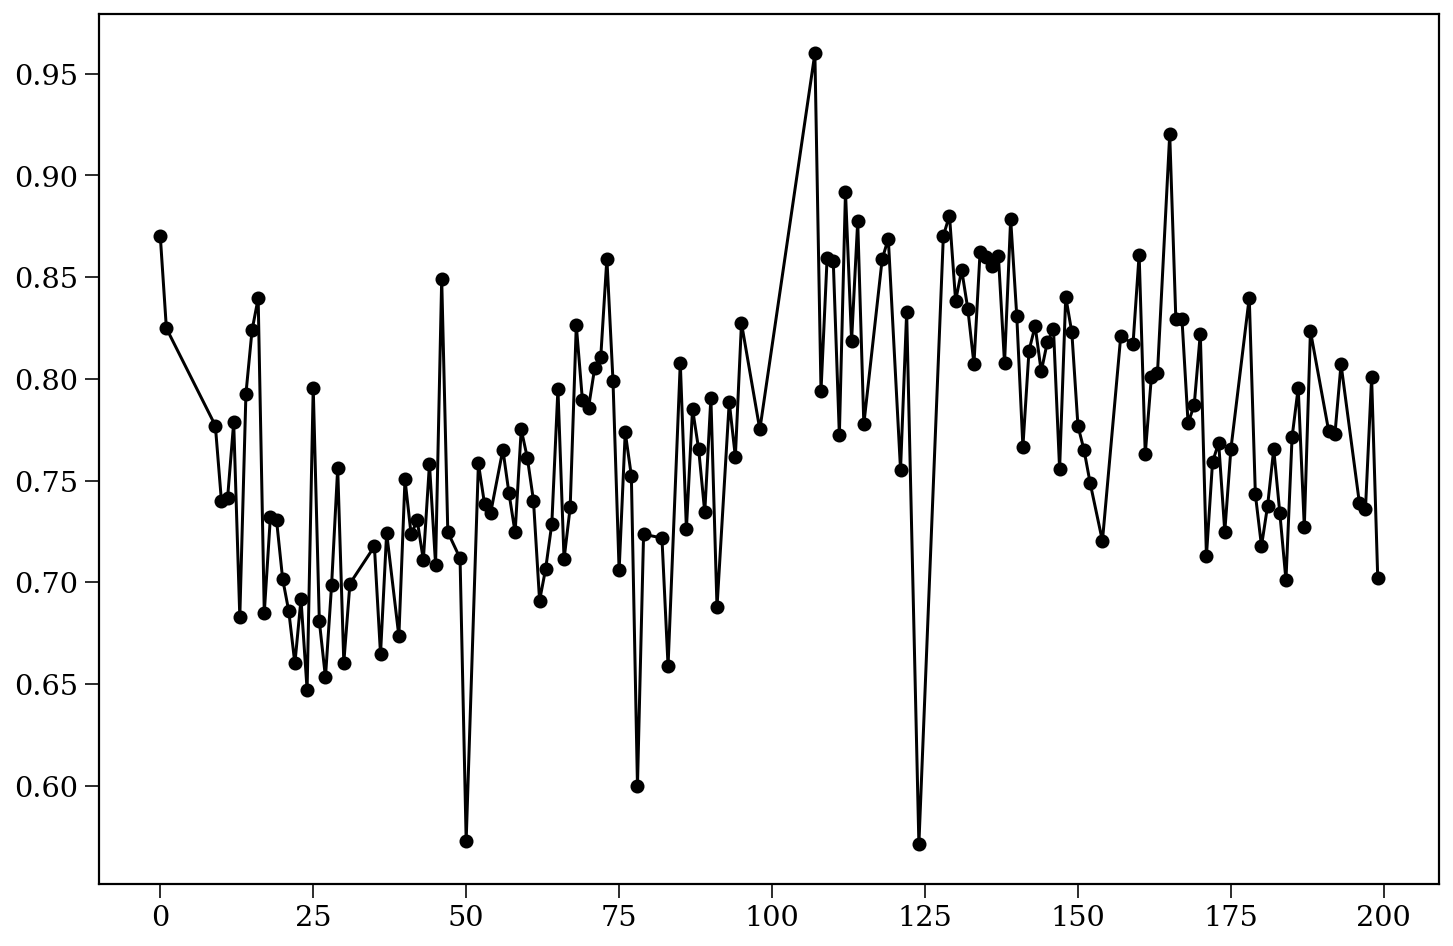

In [285]:
plt.plot(np.arange(200)[correct_NEOs > 0.0], correct_NEOs[correct_NEOs > 0.0], color="black", marker='o')
plt.show()

In [555]:
night = 95

In [556]:
S0_scores, S0_labels = lsst_neocp.get_neo_scores("neo/", night=night)
S1_scores, S1_labels = lsst_neocp.get_neo_scores("mba/", night=night)

if S0_scores is None:
    print(f"No NEO observations on night {night}")
if S1_scores is None:
    print(f"No MBA observations on night {night}")

# Print score statistics

In [557]:
correct_S0 = S0_labels[S0_scores >= 65]
incorrect_S0 = S0_labels[S0_scores < 65]

In [558]:
correct_S1 = S1_labels[S1_scores < 65]
incorrect_S1 = S1_labels[S1_scores >= 65]

In [559]:
print("{:1.2f}% of NEOs were correctly identified".format(len(correct_S0) / len(S0_scores) * 100))
print("{:1.2f}% of MBAs were correctly identified".format(len(correct_S1) / len(S1_scores) * 100))

82.75% of NEOs were correctly identified
82.81% of MBAs were correctly identified


In [560]:
print("But only {:1.2f}% of objects classified as NEOs are actually NEOs".format(len(correct_S0) / (len(correct_S0) + len(incorrect_S1)) * 100))
print("But only {} of {} objects classified as NEOs are actually NEOs".format(len(correct_S0), (len(correct_S0) + len(incorrect_S1))))

But only 0.90% of objects classified as NEOs are actually NEOs
But only 470 of 52446 objects classified as NEOs are actually NEOs


# Histograms

In [561]:
reload(lsst_neocp)

<module 'lsst_neocp' from '/data/epyc/projects/hybrid-sso-catalogs/neocp/lsst_neocp.py'>

In [562]:
neo_scores = [
    {
        "scores": S0_scores,
        "label": "NEOs",
        "colour": list(plt.get_cmap("tab10")(1))
    },
    {
        "scores": S1_scores,
        "label": "MBAs",
        "colour": list(plt.get_cmap("tab10")(4))
    },
]

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Night 95'}, xlabel='NEO Score', ylabel='Density'>)

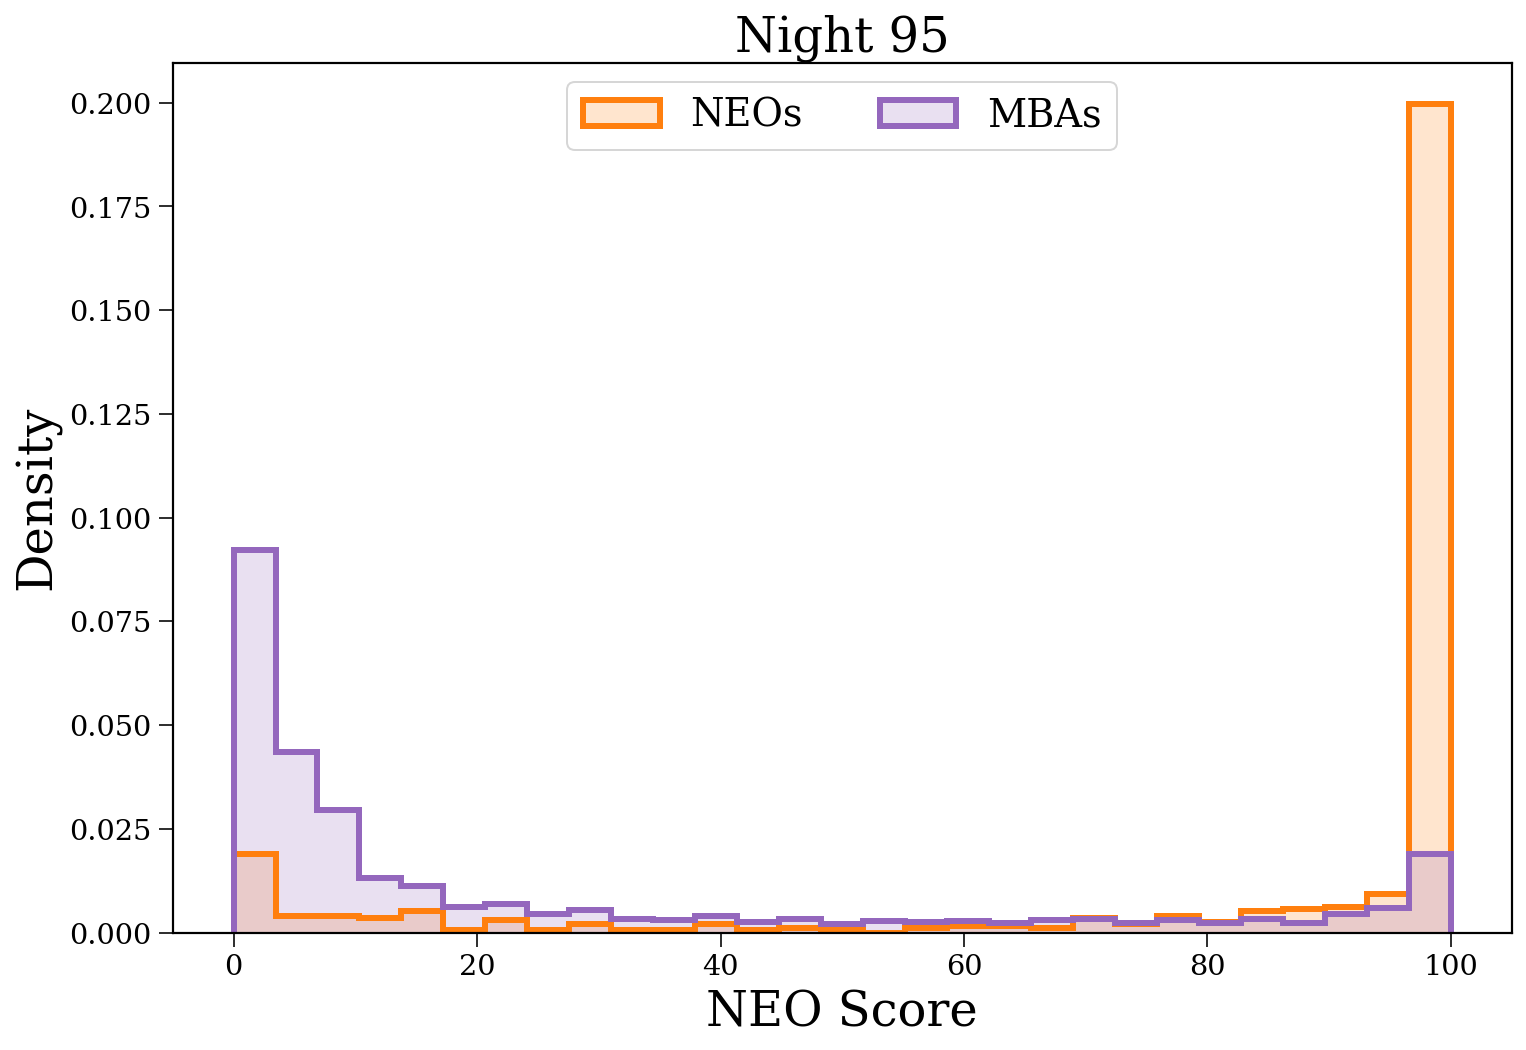

In [563]:
lsst_neocp.plot_neo_scores(neo_scores, density=True, night=night)

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Night 95'}, xlabel='NEO Score', ylabel='Number of objects'>)

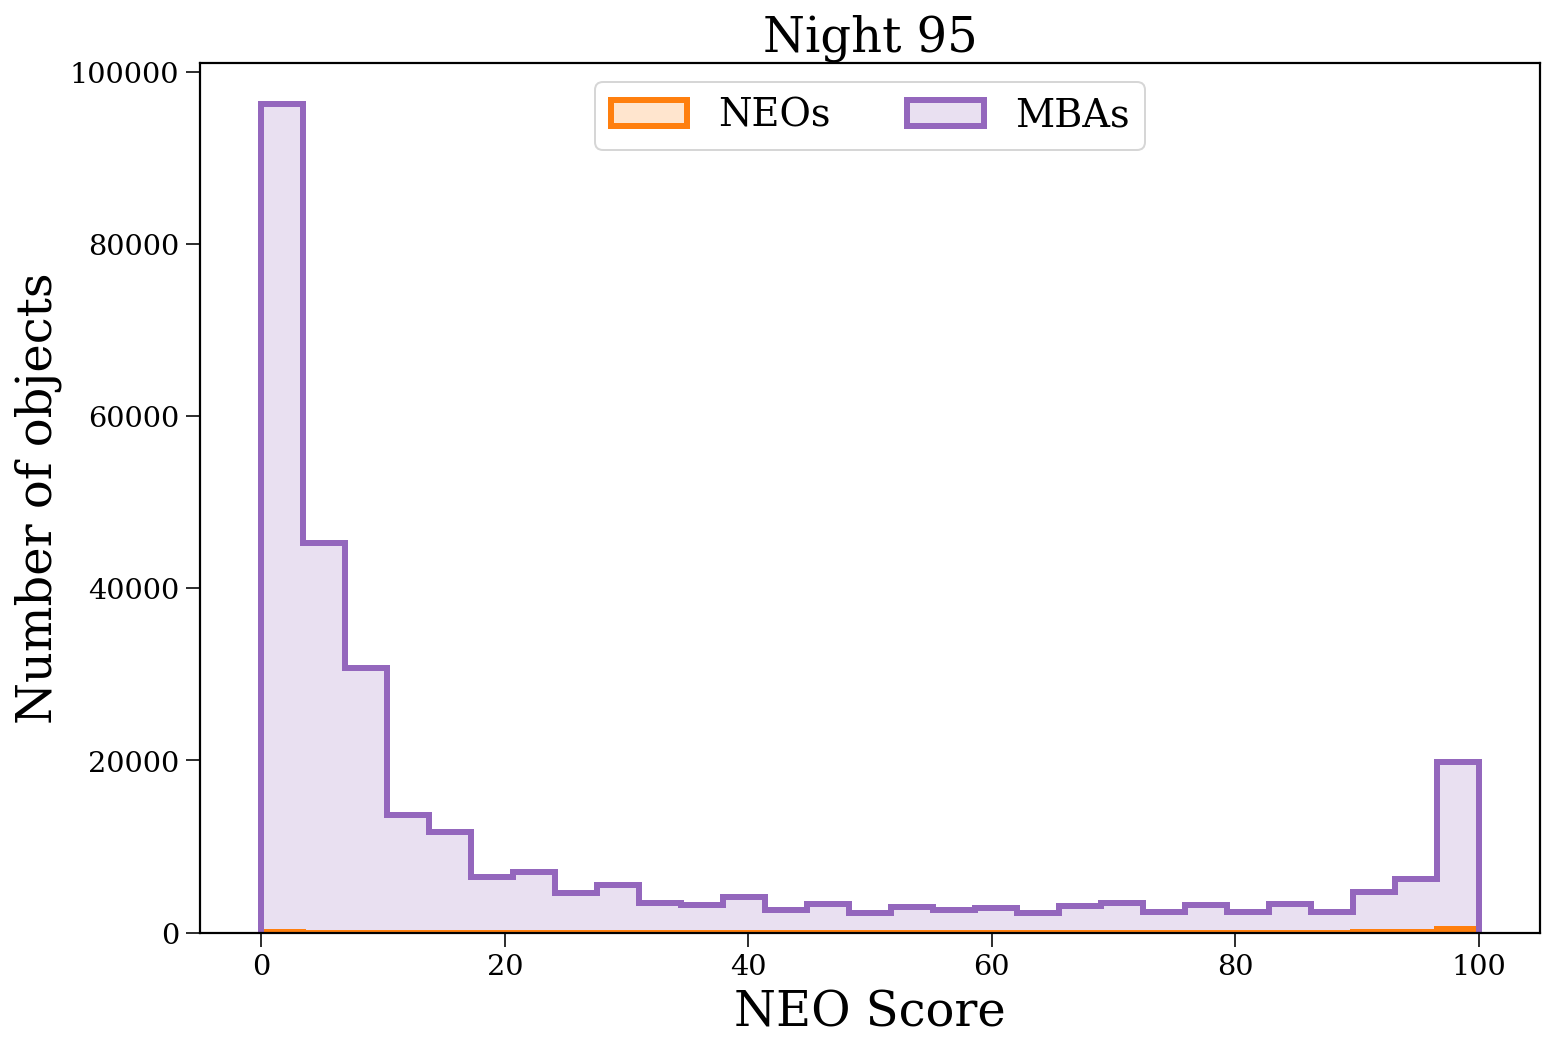

In [564]:
lsst_neocp.plot_neo_scores(neo_scores, night=night)

# Sky projections

## Set up ecliptic plane

In [565]:
lon = coord.Angle(np.linspace(-180, 179.9, 1000)*u.degree)
lat = coord.Angle(np.zeros(1000)*u.degree)

ecliptic = coord.SkyCoord(lon=lon, lat=lat, frame='geocentrictrueecliptic').transform_to("icrs")
ecliptic.ra.radian = coord.Angle(ecliptic.ra).wrap_at('180d').radian

## Get RA/Dec

In [ ]:
srun -p build --time=1:00:00 --mem=1G --pty /bin/bash

In [ ]:
Host hyak
    User tomwagg
    HostName mox.hyak.uw.edu
    ControlMaster auto
    ControlPath ~/.ssh/%r@%h:%p

In [571]:
test = "rsync -avPhu "

for file in range(14):
    test += f"S1_{file:02d}/visit-00*.h5 "
test+= "tomwagg@mox.hyak.uw.edu:/gscratch/dirac/tomwagg/simulated_obs/"

test

'rsync -avPhu S1_00/visit-00*.h5 S1_01/visit-00*.h5 S1_02/visit-00*.h5 S1_03/visit-00*.h5 S1_04/visit-00*.h5 S1_05/visit-00*.h5 S1_06/visit-00*.h5 S1_07/visit-00*.h5 S1_08/visit-00*.h5 S1_09/visit-00*.h5 S1_10/visit-00*.h5 S1_11/visit-00*.h5 S1_12/visit-00*.h5 S1_13/visit-00*.h5 tomwagg@mox.hyak.uw.edu:/gscratch/dirac/tomwagg/simulated_obs/'

In [ ]:
for folder in 01 02 03 04 05 06 07 08 09 10 11 12 13
do
        for visind in 00 01
        do
                rsync -e "ssh -o 'ControlPath=~/.ssh/%r@%h:%p'" -avPhu S1_$folder/visit-$visind*.h5 tomwagg@mox.hyak.uw.edu:/gscratch/dirac/tomwagg/simulated_obs/S1_$folder/
        done
done

In [416]:
f2n_NEO

[[0, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [31, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46],
 [46, 47, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61],
 [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
 [72, 73, 74, 75, 76, 77, 78, 79, 82, 83, 85, 86, 87, 88, 89],
 [89, 90, 91, 93, 94, 95, 98, 107, 108, 109, 110, 111, 112],
 [112, 113, 114, 115, 118, 119, 121, 122, 124, 128, 129, 130, 131, 132],
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
 [144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 157, 159],
 [159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171],
 [171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 185],
 [185, 186, 187, 188, 191, 192, 193, 196, 197, 198, 199, 200, 201, 202]]

In [573]:
[f"/gscratch/dirac/tomwagg/simulated_obs/S1_{i:02d}/" for i in range(14)]

['/gscratch/dirac/tomwagg/simulated_obs/S1_00/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_01/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_02/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_03/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_04/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_05/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_06/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_07/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_08/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_09/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_10/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_11/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_12/',
 '/gscratch/dirac/tomwagg/simulated_obs/S1_13/']

In [ ]:
#!/bin/bash
## Job Name
#SBATCH --job-name=digest2_run
#SBATCH --account=astro
#SBATCH --partition=astro
#SBATCH --nodes=1   
#SBATCH --time=48:00:00
#SBATCH --mem=100G
#SBATCH -o /gscratch/dirac/tomwagg/logs.out
#SBATCH --chdir=/gscratch/dirac/tomwagg/hybrid_sso_catalogue/neocp
#SBATCH --mail-type=ALL
#SBATCH --mail-user=tomwagg@uw.edu
#SBATCH --export=all

module load anaconda3_4.3.1

python /gscratch/dirac/tomwagg/hybrid_sso_catalogue/neocp/lsst_neocp.py --mba-hyak -d /gscratch/dirac/tomwagg/hybrid_sso_catalogue/digest2 -c 28 -s 25 -f 50 -t

In [198]:
def get_file_table(obj_type="NEO", max_nights=200, night_zero=59638):
    assert obj_type in ["NEO", "MBA"]
    
    # set the path to the observations
    if obj_type == "NEO":
        in_path = "/data/epyc/projects/jpl_survey_sim/10yrs/detections/march_start_v2.1/S0/"
    else:
        in_path = [f"/data/epyc/projects/jpl_survey_sim/10yrs/detections/march_start_v2.1/S1_{i:02d}/" for i in range(14)]

    table = []

    file = 0
    nights_done = 0
    while nights_done < 200:
        if isinstance(in_path, str):
            df = pd.read_hdf(in_path + f"visit-{int(file * 1e4):07}.h5")
        else:
            dfs = [pd.read_hdf(in_path[i] + f"visit-{int(file * 1e4):07}.h5") for i in range(len(in_path))]
            df = pd.concat(dfs)
        df["night"] = (df["FieldMJD"] - 0.5).astype(int)
        df["night"] -= night_zero

        table.append(sorted(df["night"].unique()))

        nights_done = df["night"].max() - 1

        print(file, nights_done)
        
        file += 1
    
    return table

In [128]:
# f2n_NEO = get_file_table(obj_type="NEO")
# f2n_MBA = get_file_table(obj_type="MBA")
np.save("f2n_NEO.npy", f2n_NEO)
np.save("f2n_MBA.npy", f2n_MBA)

/astro/users/tomwagg/.conda/envs/solar_system/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [566]:
def filter_tracklets(df, min_obs=2, min_arc=1, max_time=90):
    
    init = coord.SkyCoord(ra=df["AstRA(deg)"].iloc[0], dec=df["AstDec(deg)"].iloc[0], unit="deg")
    final = coord.SkyCoord(ra=df["AstRA(deg)"].iloc[-1], dec=df["AstDec(deg)"].iloc[-1], unit="deg")

    return np.logical_and.reduce((len(df) >= min_obs,
                                  init.separation(final).to(u.arcsecond).value > min_arc,
                                  df["FieldMJD"].diff().min() * 1440 < max_time))

def get_nightly_obs(obj_type="NEO", night_zero=59638, night=0):
    
    assert obj_type in ["NEO", "MBA"]
    
    # set the path to the observations
    if obj_type == "NEO":
        in_path = "/data/epyc/projects/jpl_survey_sim/10yrs/detections/march_start_v2.1/S0/"
    else:
        in_path = [f"/data/epyc/projects/jpl_survey_sim/10yrs/detections/march_start_v2.1/S1_{i:02d}/" for i in range(14)]
    
    
    file_table = f2n_NEO if obj_type == "NEO" else f2n_MBA
    
    # find out which files contain the nights you want
    mask = [night in thing for thing in f2n_NEO]
    files = np.arange(len(f2n_NEO)).astype(int)[mask]
    
    print(files)
    
    if isinstance(in_path, str):
        dfs = [pd.read_hdf(in_path + f"visit-{int(file * 1e4):07}.h5") for file in files]
    else:
        dfs = [pd.read_hdf(in_path[i] + f"visit-{int(file * 1e4):07}.h5") for i in range(len(in_path)) for file in files]
    df = pd.concat(dfs)

    df["night"] = (df["FieldMJD"] - 0.5).astype(int)
    df["night"] -= night_zero

    nightly_obs = df[df["night"] == night]
    
    mask = nightly_obs.groupby("ObjID").apply(filter_tracklets)
    nightly_obs[nightly_obs["ObjID"].isin(mask[mask].index)]
    nightly_obs = nightly_obs.sort_values(["ObjID", "FieldMJD"])
    nightly_obs["hex_id"] = np.array([s3m_to_hex7[nightly_obs["ObjID"].iloc[i]] for i in range(len(nightly_obs))])
    
    print("end")
    
    return nightly_obs

In [551]:
neo_obs = get_nightly_obs(obj_type="NEO", night=night)

[0]
end


In [552]:
mba_obs = get_nightly_obs(obj_type="MBA", night=night)

[0]
end


## Plot it!

In [314]:
sky_positions = [
    {
        "obs": neo_obs,
        "mask": neo_obs["hex_id"].isin(correct_S0),
        "label": "NEOs",
        "s": 0.1,
        "m": "o",
        "z": 10,
    },
    {
        "obs": mba_obs,
        "mask": mba_obs["hex_id"].isin(correct_S1),
        "label": "MBAs",
        "s": 0.05,
        "m": "^",
        "z": 9
    }
]

(-1.5707963267948966, 1.5707963267948966)


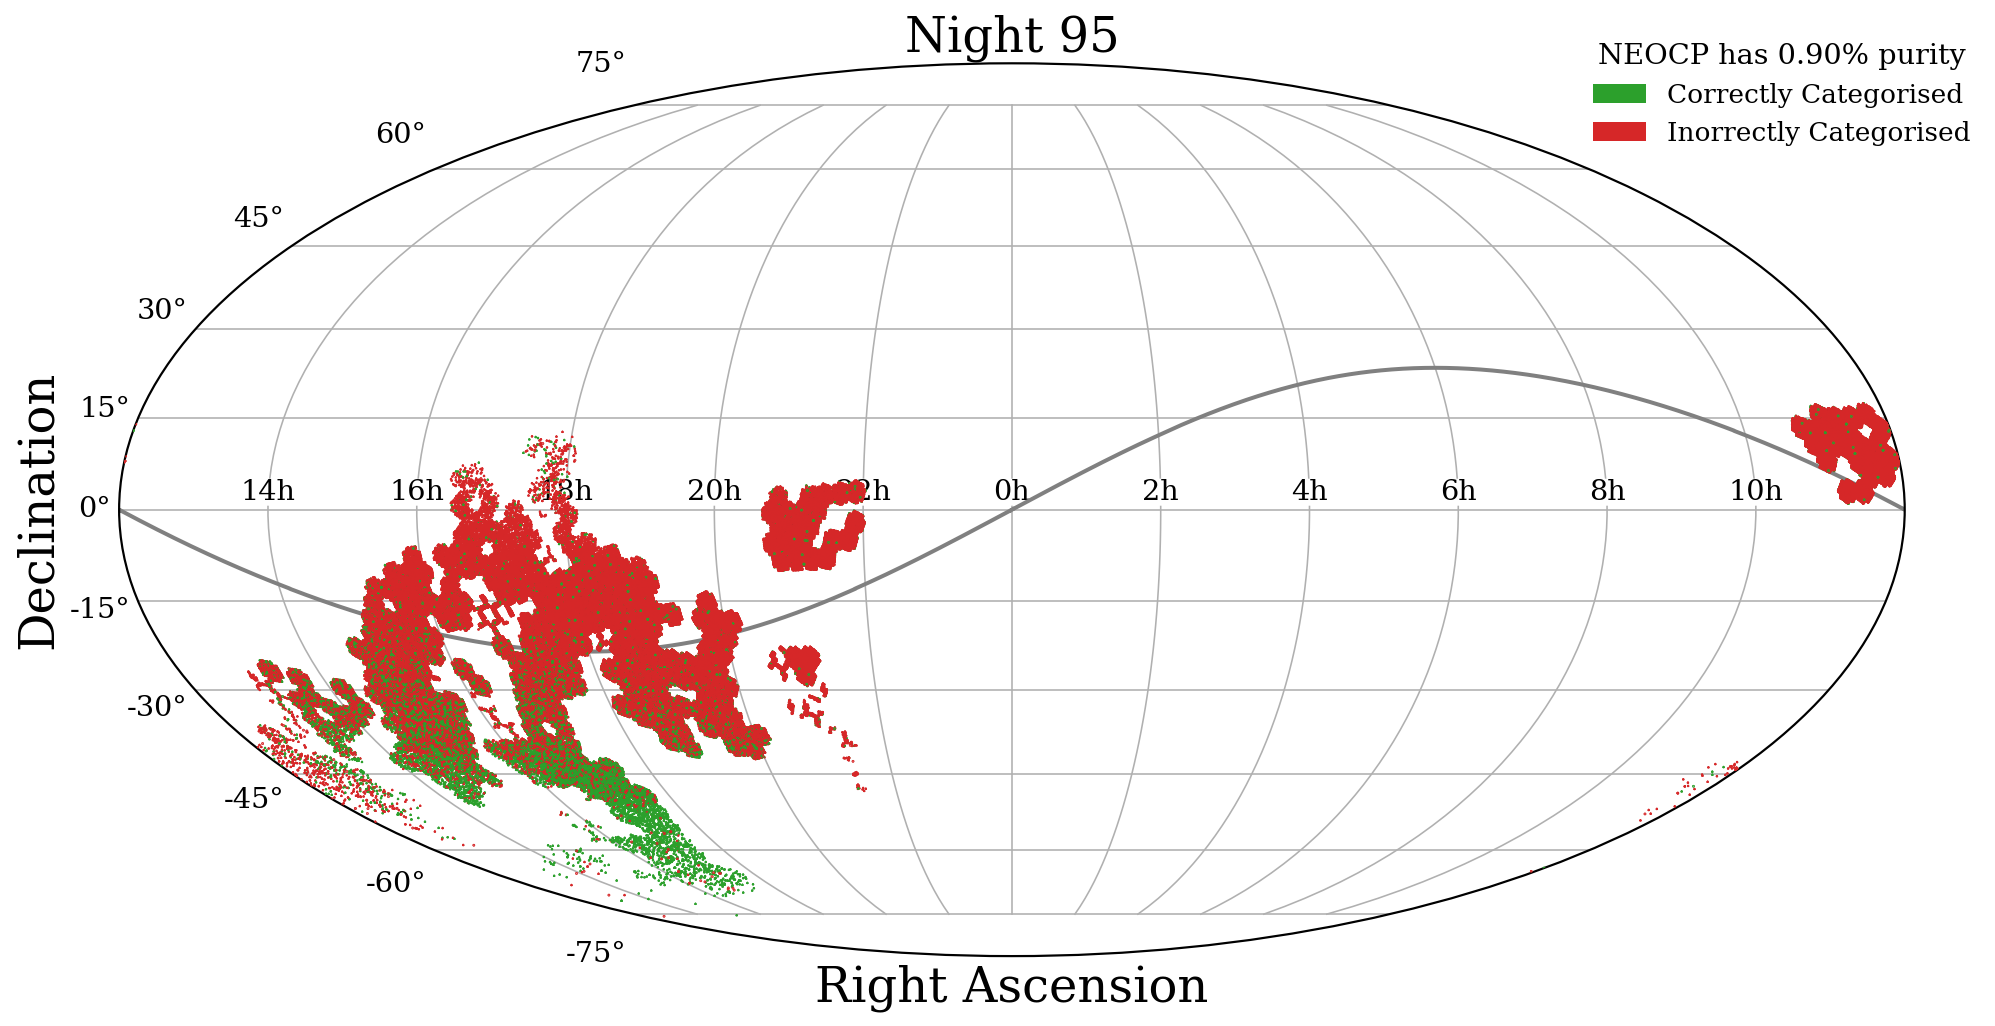

In [354]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="mollweide")

for sp in sky_positions:
    colours = np.array([plt.get_cmap("tab10")(2) for i in range(len(sp["obs"]["AstRA(deg)"]))])
    colours[sp["mask"]] = plt.get_cmap("tab10")(3)

    ra = coord.Angle(sp["obs"]["AstRA(deg)"].values * u.deg).wrap_at('180d').radian
    dec = (sp["obs"]["AstDec(deg)"].values * u.deg).to(u.rad)
    
    ax.scatter(ra, dec, s=sp["s"], label=sp["label"], marker=sp["m"], c=colours, zorder=sp["z"])
    
ax.plot(ecliptic.ra.radian, ecliptic.dec.radian, color='grey', lw=2)

ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'],
                   bbox=dict(boxstyle="round", fc="white", pad=0.0, ec="none"))
ax.grid(True)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

handles = [
    Patch(facecolor=plt.get_cmap("tab10")(2),
          label="Correctly Categorised", lw=3),
    Patch(facecolor=plt.get_cmap("tab10")(3),
          label="Inorrectly Categorised", lw=3),
]

leg = ax.legend(handles=handles, fontsize=0.55 * fs, loc="upper right", bbox_to_anchor=(1.05, 1.05), 
                edgecolor="white", framealpha=1)

leg.set_title(f"NEOCP has {len(correct_S0) / (len(correct_S0) + len(incorrect_S1)) * 100:1.2f}% purity")
leg.get_title().set_fontsize(fontsize=0.6*fs)

ax.set_title(f"Night {night}", fontsize=fs)

plt.show()

In [361]:
S1_scores

array([50., 15., 68., ...,  1.,  1.,  1.])

In [364]:
S1_labels

array(['0041915', '00419DE', '0042066', ..., '0CF0CA7', '0CFD628',
       '0CF8969'], dtype=object)

In [367]:
df = pd.DataFrame(dict(scores=S1_scores, labels=S1_labels)).set_index("labels")

In [368]:
df

,scores
labels,
0041915,50.0
00419DE,15.0
0042066,68.0
0041931,98.0
0042118,73.0
...,...
0D0F47C,1.0
0C9474E,1.0
0CF0CA7,1.0


In [379]:
mba_obs

,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,PhotometricSigma(mag),SNR,AstrometricSigma(deg),MaginFilter,dmagDetect,dmagVignet,AstRATrue(deg),AstDecTrue(deg),detectorID,night
hex_id,,,,,,,,,,,,,,,,,,,,,
00418E3,S1000004a,65307.0,59734.159046,2.624793e+08,-3.790289,254.097958,-0.226097,-2.178889,0.033854,-1.156416e+08,...,0.000435,2496.524703,0.000003,14.799923,0.015999,0.009864,254.097960,-2.178889,84.0,95
00418E3,S1000004a,65357.0,59734.183188,2.624715e+08,-3.719477,254.092494,-0.226335,-2.178070,0.033827,-1.156043e+08,...,0.001101,985.968528,0.000003,16.111920,0.017341,0.009782,254.092498,-2.178072,84.0,95
00418E7,S100000aa,65192.0,59734.105532,2.385305e+08,-4.411992,253.222117,-0.262987,-31.157599,0.022987,-1.028294e+08,...,0.000413,2631.233360,0.000003,14.046617,0.017972,0.018545,253.222114,-31.157603,24.0,95
00418E7,S100000aa,65210.0,59734.112978,2.385277e+08,-4.394934,253.220154,-0.263239,-31.157431,0.023175,-1.028172e+08,...,0.000405,2678.075291,0.000003,14.047150,0.019294,0.070881,253.220155,-31.157431,166.0,95
00418E7,S100000aa,65242.0,59734.128195,2.385219e+08,-4.358885,253.216146,-0.263696,-31.157079,0.023572,-1.027925e+08,...,0.000154,7066.700183,0.000003,12.734437,0.022029,0.018161,253.216146,-31.157075,24.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0D72D98,S106VbQUa,65182.0,59734.099726,9.974579e+07,6.178443,229.494417,-0.200177,-20.709388,-0.208399,-1.045222e+08,...,0.270216,3.538748,0.000032,23.802739,0.059247,-0.000000,229.494422,-20.709365,49.0,95
0D72D98,S106VbQUa,65453.0,59734.227594,9.981591e+07,6.507630,229.468957,-0.195843,-20.735589,-0.202765,-1.042722e+08,...,0.220718,4.436037,0.000024,24.296919,0.062319,-0.000000,229.468961,-20.735643,89.0,95
0D73480,S106XnbBa,65134.0,59734.075912,5.217469e+07,3.057518,233.105359,-0.183319,-12.146769,-0.564780,-7.460098e+07,...,0.070790,14.842774,0.000008,23.136958,0.208878,0.007956,233.105363,-12.146769,61.0,95


In [387]:
np.isnan(S1_scores).any()

True

In [400]:
counts = mba_obs["ObjID"].groupby("hex_id").count()
counts.rename("n_obs", inplace=True)

hex_id
00418E3    2
00418E7    4
0041915    2
0041926    4
0041931    2
          ..
0D3F1DD    3
0D52EFB    2
0D61838    4
0D72D98    2
0D73480    3
Name: n_obs, Length: 302403, dtype: int64

In [415]:
len(counts[counts >= 5])

20943

In [403]:
x = mba_obs.join(df, on="hex_id").join(counts, on="hex_id").sort_values(["scores", "hex_id"], ascending=False)

In [405]:
len(x[x["n_obs"] <= 2]) / len(x)

0.4631029550392901

In [372]:
mba_obs.set_index("hex_id", inplace=True)